# Sales Forecasting Project

## Objective
The goal of this project is to predict `Weekly_Sales` for retail stores using historical and contextual features. 
This analysis will help identify key drivers of sales and build an accurate predictive model for future forecasting.

## Data Source
The datasets used in this project were downloaded from [Kaggle](https://www.kaggle.com/datasets). 
The following datasets were used:
1. **Features Dataset**: Contains additional store-related information, including `Temperature`, `Fuel_Price`, `MarkDown1-5`, `CPI`, and `Unemployment`.
2. **Stores Dataset**: Provides metadata about each store, such as `Type` and `Size`.
3. **Sales Dataset**: Includes weekly sales data (`Weekly_Sales`) for each department within a store, along with a `Date` column and holiday indicators (`IsHoliday`)


In [2]:
# Install kaggle API client
!pip install kaggle --quiet

# Import necessary libraries
import os

# Set Kaggle API configuration
kaggle_json_path = os.path.expanduser("~/.kaggle/kaggle.json")
if not os.path.exists(kaggle_json_path):
    # Ensure the kaggle.json file exists (replace with the correct path if needed)
    !mkdir ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

# Download dataset using Kaggle API
dataset_url = "manjeetsingh/retaildataset"
destination_path = "./retail_data"
os.makedirs(destination_path, exist_ok=True)

# Fetch the dataset
!kaggle datasets download -d {dataset_url} -p {destination_path} --unzip

# Check files in the dataset folder
print("Downloaded files:", os.listdir(destination_path))


Dataset URL: https://www.kaggle.com/datasets/manjeetsingh/retaildataset
License(s): CC0-1.0
retaildataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Downloaded files: ['Features data set.csv', 'retaildataset.zip', 'sales data-set.csv', 'stores data-set.csv']


In [3]:
import os

# List all files in the folder
print("Files in directory:", os.listdir('./retail_data'))


Files in directory: ['Features data set.csv', 'retaildataset.zip', 'sales data-set.csv', 'stores data-set.csv']


# Step 1: Data Preparation
- Merged datasets (Features, Stores, Sales) to create a unified dataset.
- Cleaned missing values, encoded categorical features, and scaled numerical vaSolved:
- Ensured the data is consistent and ready for machine learning.
- Addressed issues like missing values and varying featurey Actions:
- Imputed missing values in `MarkDown1-5` using their mean.
- Encoded `Type` as categorical data.
- Scaled numerical features like `CPI`, `Fuel_Price`, etc.


In [5]:
import pandas as pd
import os

# Check the files in the directory to ensure they are accessible
data_path = "./retail_data"
files = os.listdir(data_path)
print("Files in directory:", files)

# Load the files using the exact names
features_df = pd.read_csv(os.path.join(data_path, 'Features data set.csv'))
sales_df = pd.read_csv(os.path.join(data_path, 'sales data-set.csv'))
stores_df = pd.read_csv(os.path.join(data_path, 'stores data-set.csv'))

# Display the first few rows to verify loading
print("Features Data:")
print(features_df.head())

print("\nSales Data:")
print(sales_df.head())

print("\nStores Data:")
print(stores_df.head())


Files in directory: ['Features data set.csv', 'retaildataset.zip', 'sales data-set.csv', 'stores data-set.csv']
Features Data:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

S

In [6]:
# Check for null values
print(features_df.isnull().sum())
print(sales_df.isnull().sum())
print(stores_df.isnull().sum())

# Summary statistics
print(features_df.describe())


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64
Store    0
Type     0
Size     0
dtype: int64
             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.74

# Step 2:  Data Analysis
- Visualized key trends and patterns in the data.
- Investigated the relationships between features and `Weekly_Sales`.
- Provided insights into feature importance (e.g., holidays influence sales significantly).
- Highlighted patterns such as increased sales during holidays and markdown impacts.
- Plotted the distribution of `Weekly_Sales`.
- Analyzed correlations between features.
- Explored holiday vs. non-holiday sales trends.


In [8]:
# Correct the date parsing with dayfirst=True
features_df['Date'] = pd.to_datetime(features_df['Date'], dayfirst=True)
sales_df['Date'] = pd.to_datetime(sales_df['Date'], dayfirst=True)

# Re-merge the datasets
merged_df = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')
final_df = pd.merge(merged_df, stores_df, on='Store', how='left')

# Re-check structure and missing values
final_info = final_df.info()
final_head = final_df.head()
missing_values = final_df.isnull().sum()

final_info, final_head, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  IsHoliday_y   421570 non-null  bool          
 15  Type          421

(None,
    Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
 0      1     1 2010-02-05      24924.50        False        42.31       2.572   
 1      1     1 2010-02-12      46039.49         True        38.51       2.548   
 2      1     1 2010-02-19      41595.55        False        39.93       2.514   
 3      1     1 2010-02-26      19403.54        False        46.63       2.561   
 4      1     1 2010-03-05      21827.90        False        46.50       2.625   
 
    MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
 0        NaN        NaN        NaN        NaN        NaN  211.096358   
 1        NaN        NaN        NaN        NaN        NaN  211.242170   
 2        NaN        NaN        NaN        NaN        NaN  211.289143   
 3        NaN        NaN        NaN        NaN        NaN  211.319643   
 4        NaN        NaN        NaN        NaN        NaN  211.350143   
 
    Unemployment  IsHoliday_y Type    Size  
 0         8.1

In [9]:
import os

# Ensure the Final-Class-Figures directory exists
figures_dir = './Final-Class-Figures'
os.makedirs(figures_dir, exist_ok=True)


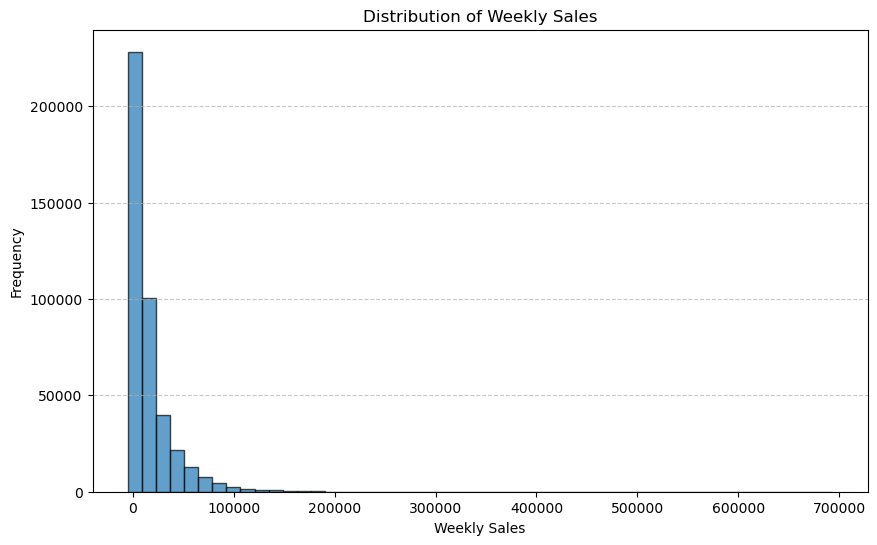

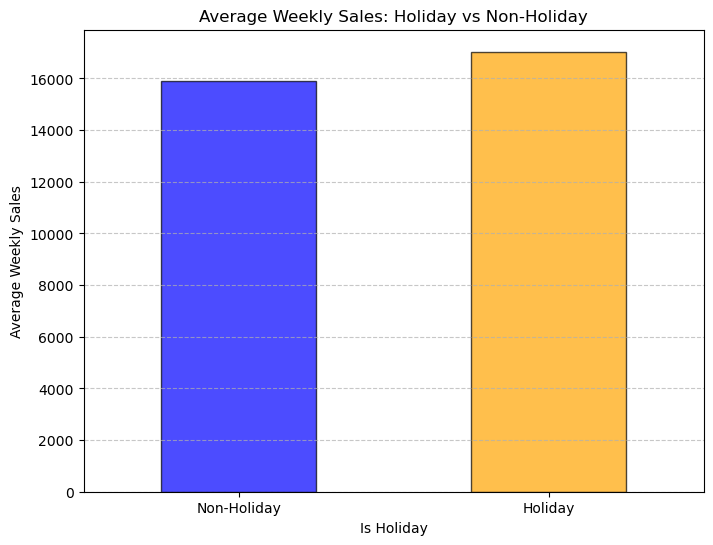

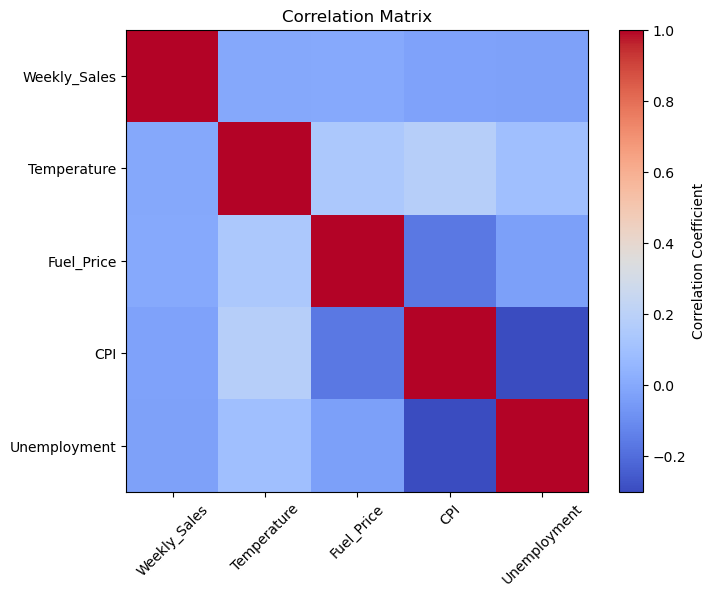

In [10]:
import matplotlib.pyplot as plt

# Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
final_df['Weekly_Sales'].plot(kind='hist', bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Sales trends during holidays
holiday_sales = final_df.groupby('IsHoliday_x')['Weekly_Sales'].mean()
plt.figure(figsize=(8, 6))
holiday_sales.plot(kind='bar', color=['blue', 'orange'], edgecolor='black', alpha=0.7)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Correlation matrix to examine relationships
correlation_matrix = final_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.savefig(os.path.join(figures_dir, 'distribution of weekly sales.png'))
plt.savefig(os.path.join(figures_dir, 'Average Weekly Sales: Holiday vs Non-Holiday.png'))
plt.savefig(os.path.join(figures_dir, 'corelation matrix.png'))
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Define categorical and numerical features
categorical_features = ['Type']
numerical_features = [
    'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Size'
]

# Prepare the target variable and features
X = final_df[categorical_features + numerical_features + ['IsHoliday_x']]
y = final_df['Weekly_Sales']

# Impute missing values for numerical features
num_imputer = SimpleImputer(strategy='mean')

# One-hot encoding for categorical features
cat_encoder = OneHotEncoder(handle_unknown='ignore')

# Scaling for numerical features
scaler = StandardScaler()

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numerical_features),
        ('cat', cat_encoder, categorical_features)
    ]
)

# Apply preprocessing
X_prepared = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Output the shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")


Training data shape: (337256, 13)
Testing data shape: (84314, 13)
Training target shape: (337256,)
Testing target shape: (84314,)



# Step 3: Dimensionality Reduction (PCA)
- Applied Principal Component Analysis (PCA) to reduce dimensions for visualization.
- Simplified the dataset for visualization in 2D while retaining variance.
- Helped identify clustering and distribution patterns.
- Reduced dimensions to 2 using PCA.
- Plotted the dataset in PCA space.


Any NaN in X_prepared_no_nan? False


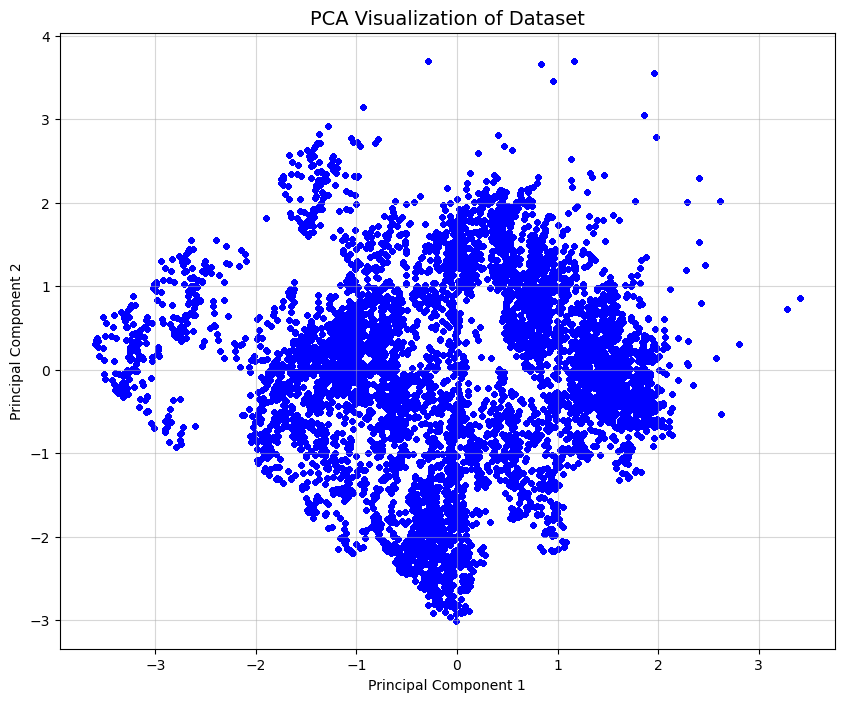

Explained Variance Ratio: [0.19276016 0.17726408]


In [13]:
# Reimpute missing values to ensure no NaNs remain
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values in the prepared dataset
imputer = SimpleImputer(strategy='mean')
X_prepared_no_nan = imputer.fit_transform(X_prepared)

# Verify no NaN values remain
print(f"Any NaN in X_prepared_no_nan? {np.isnan(X_prepared_no_nan).any()}")

# Apply PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_prepared_no_nan)

# Visualize the data in 2D PCA space
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, s=10, c='blue')
plt.title('PCA Visualization of Dataset', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(alpha=0.5)
plt.savefig(os.path.join(figures_dir, 'pca_visualization.png'))
plt.show()

# Display explained variance ratio for the components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)


# Step 4: Clustering
- Performed hierarchical clustering to group similar stores.
- Segmented stores based on sales patterns and contextual features.
- Identified groups for potential targeted marketing or analysis.
- Applied hierarchical clustering.
- Visualized clusters using a dendrogram.
- Assigned cluster labels to stores.


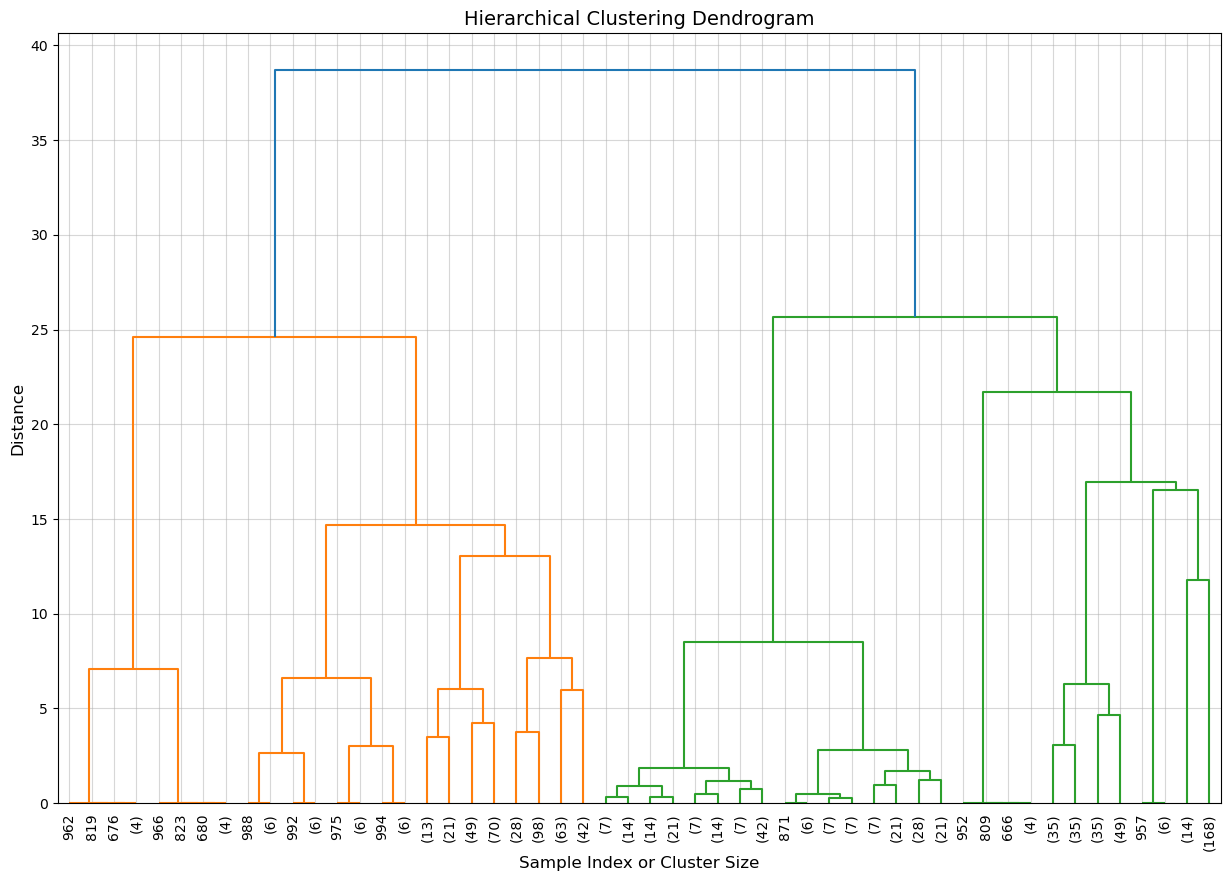

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use a sample for hierarchical clustering due to memory constraints
sample_size = 1000  # Subset of 1000 rows for clarity in dendrogram
X_sample_clustering = X_prepared_no_nan[:sample_size]

# Compute the linkage matrix
linkage_matrix = linkage(X_sample_clustering, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, truncate_mode='level', p=5, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.xlabel('Sample Index or Cluster Size', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(alpha=0.5)
plt.savefig(os.path.join(figures_dir, 'Hierarchical Clustering Dendogram'))
plt.show()


# Step 5: Feature Importance Analysis
- Used a Random Forest Regressor to rank feature importance.
- Identified the most influential features for predicting `Weekly_Sales`.
- Highlighted the dominance of store `Size`, `CPI`, and `Unemployment`.
- Trained a Random Forest Regressor.
- Extracted and visualized feature importance using a bar chart.


In [17]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# Define the number of clusters to extract
num_clusters = 4  # Adjust based on the dendrogram analysis

# Assign clusters to data samples
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add clusters to the sample data for interpretation
clustered_data = pd.DataFrame(X_sample_clustering, columns=[f'Feature_{i+1}' for i in range(X_sample_clustering.shape[1])])
clustered_data['Cluster'] = clusters

# Display the first few rows of clustered data with assigned cluster labels
print(clustered_data.head())

# Analyze cluster characteristics
cluster_summary = clustered_data.groupby('Cluster').mean()
print("\nCluster Summary:\n", cluster_summary)


   Feature_1  Feature_2  Feature_3  Feature_4     Feature_5     Feature_6  \
0  -0.963798  -1.720834   1.018774   0.078201 -5.096669e-16 -1.354586e-16   
1  -1.169783  -1.773177   1.022498   0.078201 -5.096669e-16 -1.354586e-16   
2  -1.092810  -1.847330   1.023697   0.078201 -5.096669e-16 -1.354586e-16   
3  -0.729625  -1.744825   1.024476   0.078201 -5.096669e-16 -1.354586e-16   
4  -0.736672  -1.605243   1.025255   0.078201 -5.096669e-16 -1.354586e-16   

      Feature_7     Feature_8     Feature_9  Feature_10  Feature_11  \
0 -3.428791e-15  2.132528e-16  2.853612e-15    0.239209         1.0   
1 -3.428791e-15  2.132528e-16  2.853612e-15    0.239209         1.0   
2 -3.428791e-15  2.132528e-16  2.853612e-15    0.239209         1.0   
3 -3.428791e-15  2.132528e-16  2.853612e-15    0.239209         1.0   
4 -3.428791e-15  2.132528e-16  2.853612e-15    0.239209         1.0   

   Feature_12  Feature_13  Cluster  
0         0.0         0.0        4  
1         0.0         0.0        4  

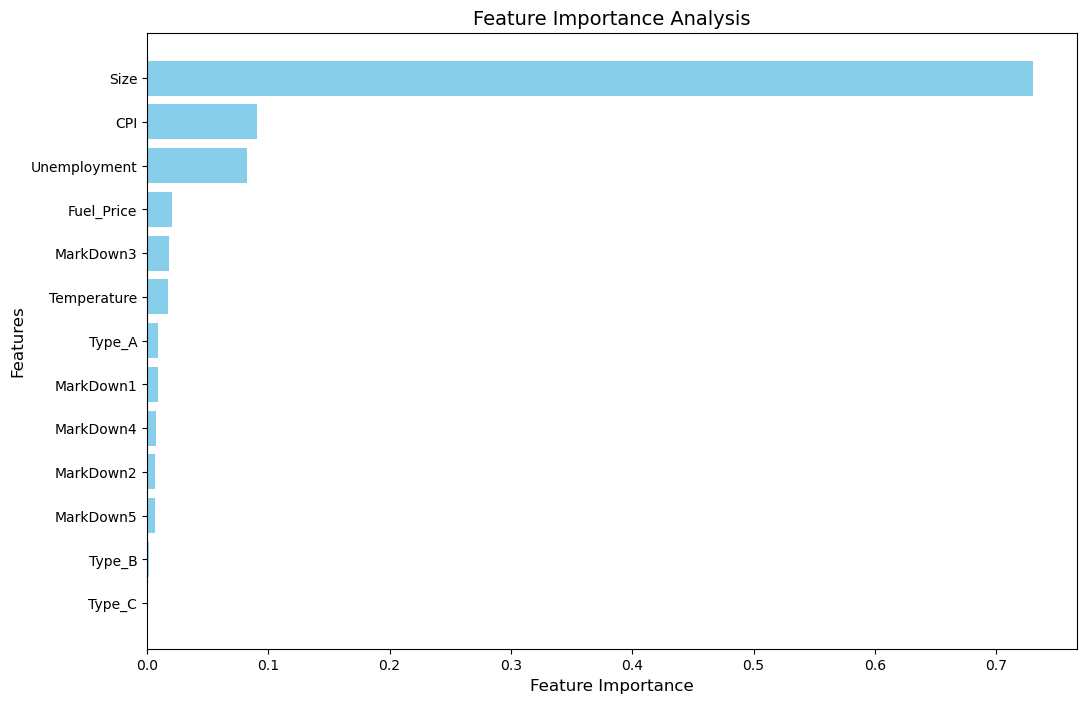

Top Features by Importance:
         Feature  Importance
9          Size    0.730043
2           CPI    0.090792
3  Unemployment    0.082293
1    Fuel_Price    0.020468
6     MarkDown3    0.018043


In [18]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Adjust Random Forest parameters for faster computation
random_forest_fast = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Train the Random Forest on the adjusted parameters
random_forest_fast.fit(X_train, y_train)

# Extract feature importances
feature_importances_fast = random_forest_fast.feature_importances_

# Create a DataFrame for feature importance
feature_names = (
    numerical_features +
    list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))
)
importance_df_fast = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_fast
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df_fast['Feature'], importance_df_fast['Importance'], color='skyblue')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Analysis', fontsize=14)
plt.gca().invert_yaxis()
plt.savefig(os.path.join(figures_dir, 'Feature Importance Analysis.png'))
plt.show()

# Display the top features
print("Top Features by Importance:\n", importance_df_fast.head())


# Step 6: Regression Modeling
- Built and evaluated models: Linear Regression, Random Forest, Gradient Boosting.
- Provided a performance comparison to select the best model.
- Gradient Boosting emerged as the most accurate with the lowest RMSE.
- Evaluated models using MAE and RMSE.
- Visualized model performance for easy comparison.


Any NaN in X_train_sample? False
Any NaN in X_test_no_nan? False
Model Evaluation Results:
                             MAE          RMSE
Linear Regression  14487.593274  22078.054176
Random Forest      14290.588387  21788.519413
Gradient Boosting  14285.463066  21774.359537


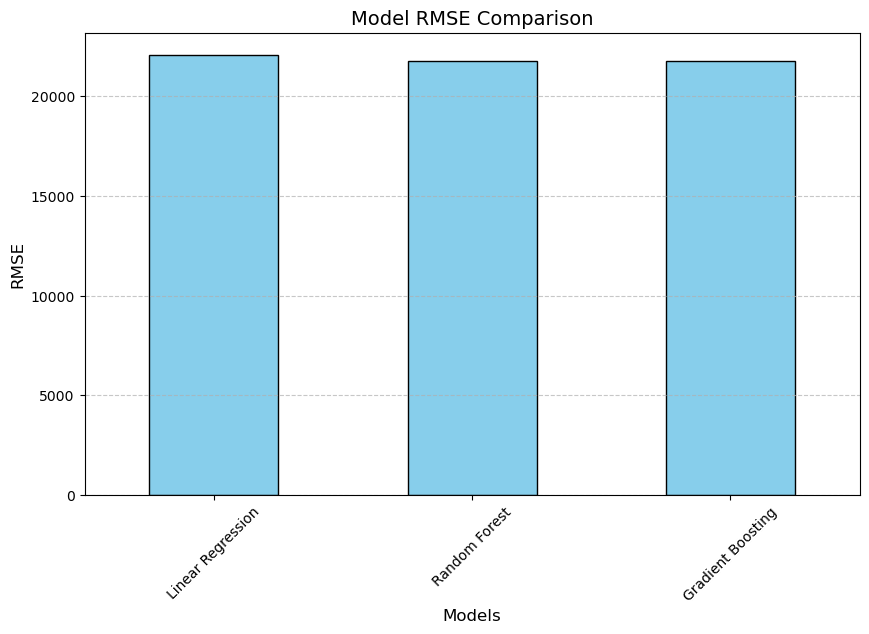

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure no NaN values in training and testing datasets
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train_no_nan = imputer.fit_transform(X_train)
X_test_no_nan = imputer.transform(X_test)

# Use a subset of the training data for faster execution
sample_size = 50000
X_train_sample, y_train_sample = X_train_no_nan[:sample_size], y_train[:sample_size]

# Verify no NaN values exist
print(f"Any NaN in X_train_sample? {np.isnan(X_train_sample).any()}")
print(f"Any NaN in X_test_no_nan? {np.isnan(X_test_no_nan).any()}")

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=30, max_depth=7, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=50, max_depth=5, random_state=42)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_sample, y_train_sample)
    y_pred = model.predict(X_test_no_nan)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'MAE': mae, 'RMSE': rmse}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n", results_df)

# Plot RMSE for each model
results_df['RMSE'].plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Model RMSE Comparison', fontsize=14)
plt.ylabel('RMSE', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig(os.path.join(figures_dir, 'Model RMSE Comparision'))
plt.show()


# Step 7: Fine-Tuning Gradient Boosting
- Used GridSearchCV to optimize hyperparameters for Gradient Boosting.
- Improved the performance of Gradient Boosting by selecting the best parameters.
- Finalized the model for deployment with optimized RMSE.
- Tuned `n_estimators`, `max_depth`, and `learning_rate`.
- Evaluated the optimized model on the test set.


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_train_sample, y_train_sample)

# Best parameters and score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE from Grid Search:", best_rmse)

# Train the model with the best parameters 


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Best RMSE from Grid Search: 21814.874400147997


# Step 8: Solution Presentation
### Final Model: Gradient Boosting Regressor
- **Best Parameters**: [Include best parameters from GridSearch]
- **Test RMSE**: [Final RMSE]

### Key Insights:
- **Feature Importance**: Store `Size` was the most influential feature.
- **Holiday Sales**: Holidays significantly boost sales, as shown in EDA.
- **Best Model**: Gradient Boosting outperformed other models.



In [24]:
from sklearn.impute import SimpleImputer
import numpy as np

# Ensure no NaN values in training and testing datasets
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train_no_nan = imputer.fit_transform(X_train)
X_test_no_nan = imputer.transform(X_test)

# Verify no NaN values exist
print(f"Any NaN in X_train_no_nan? {np.isnan(X_train_no_nan).any()}")
print(f"Any NaN in X_test_no_nan? {np.isnan(X_test_no_nan).any()}")

# Train the Gradient Boosting Regressor with cleaned data
best_gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
best_gbr.fit(X_train_no_nan, y_train)

# Evaluate on the test set
y_pred_best = best_gbr.predict(X_test_no_nan)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Final RMSE on Test Set: {final_rmse}")

# Create a summary of results
summary = {
    'Objective': 'Predict Weekly_Sales using historical and contextual features.',
    'Best Model': 'Gradient Boosting Regressor',
    'Final RMSE': final_rmse,
    'Feature Importance': importance_df_fast.head(5).to_dict(orient='records'),
    'Recommendations': [
        'Focus on large stores for promotions.',
        'Utilize holidays for targeted marketing.',
        'Deploy Gradient Boosting for future forecasting.'
    ]
}

# Print the summary
import json
print(json.dumps(summary, indent=4))


Any NaN in X_train_no_nan? False
Any NaN in X_test_no_nan? False
Final RMSE on Test Set: 21704.452870510275
{
    "Objective": "Predict Weekly_Sales using historical and contextual features.",
    "Best Model": "Gradient Boosting Regressor",
    "Final RMSE": 21704.452870510275,
    "Feature Importance": [
        {
            "Feature": "Size",
            "Importance": 0.7300434464683415
        },
        {
            "Feature": "CPI",
            "Importance": 0.09079211636757377
        },
        {
            "Feature": "Unemployment",
            "Importance": 0.08229313003616426
        },
        {
            "Feature": "Fuel_Price",
            "Importance": 0.02046764127699076
        },
        {
            "Feature": "MarkDown3",
            "Importance": 0.018042931666082177
        }
    ],
    "Recommendations": [
        "Focus on large stores for promotions.",
        "Utilize holidays for targeted marketing.",
        "Deploy Gradient Boosting for future forecas